In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
sx = MinMaxScaler()
sy = MinMaxScaler()

In [24]:
scaled_X= sx.fit_transform(df.drop('price',axis='columns'))
scaled_Y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [26]:
scaled_Y.reshape(20,)


array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [35]:
scaled_X.shape[0]


20

In [36]:
def batch_gredient_decent(x,y_true,epochs,learning_rate=0.01):
  no_of_features=x.shape[1]

  w=np.ones(no_of_features)
  bias=0
  total_sample=x.shape[0]
  cost_list =[]
  epochs_list=[]

  for i in range(epochs):
    y_pred = np.dot(w,x.T)+bias

    w_grad = -(2/total_sample)*(x.T.dot(y_pred-y_true))
    b_grad = -(2/total_sample)*np.sum(y_pred-y_true)

    w=w+learning_rate*w_grad
    bias=bias+learning_rate*b_grad

    cost = np.mean(np.square(y_pred-y_true))

    if i%10==0:
      cost_list.append(cost)
      epochs_list.append(i)

  return w,bias,cost,cost_list,epochs_list


In [38]:
w,bias,cost,cost_list,epochs_list = batch_gredient_decent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0]),500)
w,bias,cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

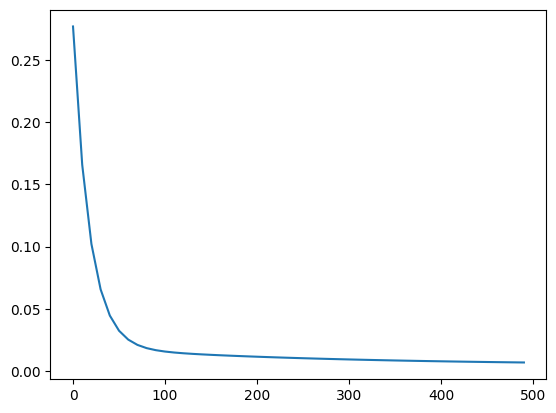

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(epochs_list,cost_list)